In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import votable
from astropy.table import Table
from astroquery.esa.xmm_newton import XMMNewton
from astropy.coordinates import SkyCoord
import astropy.units as u

In [55]:
result = XMMNewton.query_xsa_tap("select top 10 * from xsa.v_epic_source_cat", output_format='csv', output_file='/Users/kciurleo/Documents/kciurleo/AGN/unorganized/test_results.csv')

print(result)

      bii        ccdm1 ccdm2 ccdpn ... tseries var_exp_id var_flag var_inst_id
---------------- ----- ----- ----- ... ------- ---------- -------- -----------
-52.142557318696     7     3     3 ...   false         --       --          --
-18.113900744149     6     7     4 ...   false         --       --          --
-59.907964825252     3     4    10 ...   false         --       --          --
-59.754597327708     3     5     8 ...    true         --       --          --
 5.5816273421188     6     7     4 ...   false         --       --          --
-38.124328197669     5    --    -- ...   false         --       --          --
-55.449909227666    --     2     2 ...   false         --       --          --
-60.771415214831    --     4    11 ...   false         --       --          --
-59.866008014595     3     4    -- ...   false         --       --          --
-17.536153023868     6     7    -- ...    true       S003    false          M2


In [2]:
seyferts = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.vot').to_table().to_pandas()

In [3]:
XMM_result = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/XMM_query_result.vot').to_table().to_pandas()

In [4]:
#Get angular separation in arcsec
for id, row in XMM_result.iterrows():
    base_coords = SkyCoord(ra=row['ra']*u.deg, dec=row['dec']*u.deg, frame='icrs')
    separation = base_coords.separation(SkyCoord(row['ra_2']*u.deg, row['dec_2']*u.deg, frame='icrs')).to(u.arcsec).value
    XMM_result.at[id, 'Separation'] = separation

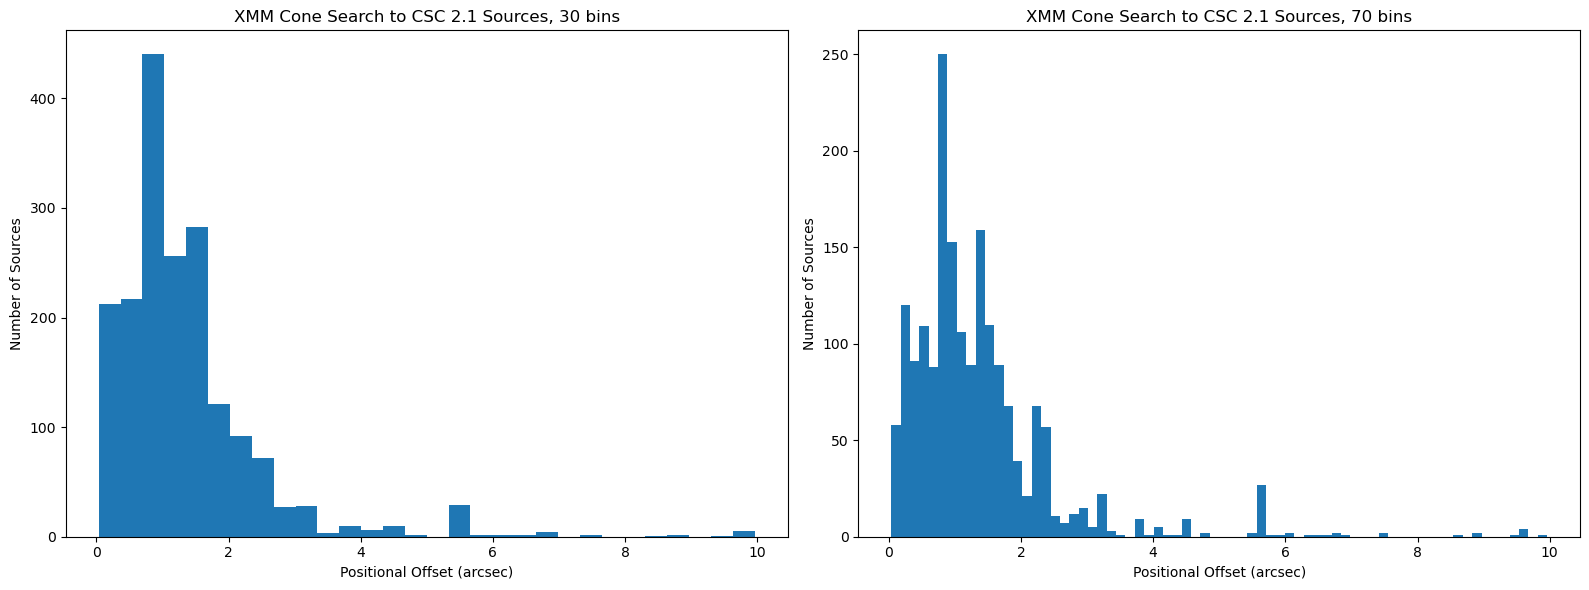

In [5]:
#Histogram
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(XMM_result['Separation'], bins=30)
axs[0].set_xlabel("Positional Offset (arcsec)")
axs[0].set_ylabel("Number of Sources")
axs[0].set_title("XMM Cone Search to CSC 2.1 Sources, 30 bins")


axs[1].hist(XMM_result['Separation'], bins=70)
axs[1].set_xlabel("Positional Offset (arcsec)")
axs[1].set_ylabel("Number of Sources")
axs[1].set_title("XMM Cone Search to CSC 2.1 Sources, 70 bins")
plt.tight_layout()
plt.show()

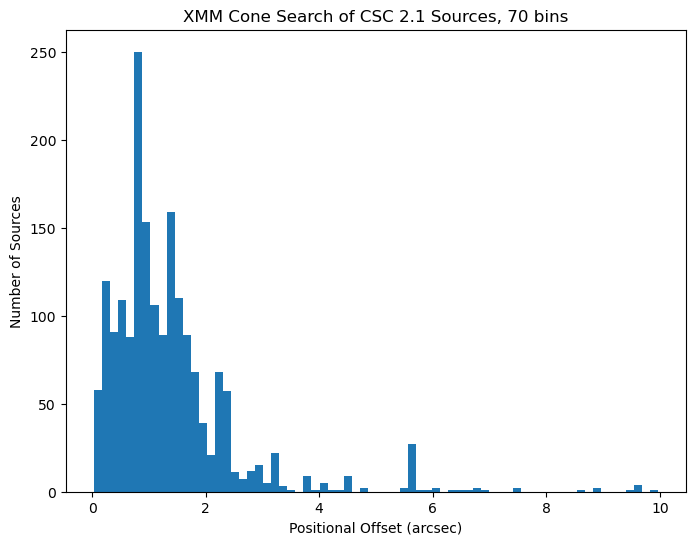

In [6]:
#Single histogram for thesis
#Histogram
plt.figure(figsize=(8, 6))

plt.hist(XMM_result['Separation'], bins=70)
plt.xlabel("Positional Offset (arcsec)")
plt.ylabel("Number of Sources")
plt.title("XMM Cone Search of CSC 2.1 Sources, 70 bins")
plt.savefig("/Users/kciurleo/Documents/kciurleo/AGN/plots/xmmhist.pdf")
plt.show()

In [72]:
#Quick Koulouridis sanity check
csc_obsids = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/obsids_seyferts.csv')['CHANDRA_OBSID']
koulouridis_obsids = [2135,9270,11688,11689,12106,12119,12735,18121,19496,20888,20889,20890,20891,28658]

In [77]:
#Identified by Koulouridis but not by me:
print(set(koulouridis_obsids)- set(csc_obsids))
print('from PKS 0836+299, 4c+29.30, and MRK34')

#Identified by both of us:
print(set(koulouridis_obsids)-(set(koulouridis_obsids)- set(csc_obsids)))
print('all from 3C 192')

#Want to check to see what targets the guys I don't have are related to somehow

{11688, 11689, 12106, 18121, 28658, 2135, 12119, 12735}
from PKS 0836+299, 4c+29.30, and MRK34
{19496, 9270, 20888, 20889, 20890, 20891}
all from 3C 192


In [2]:
XMMNewton.get_columns('xsa.v_epic_source_cat')

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


['bii',
 'ccdm1',
 'ccdm2',
 'ccdpn',
 'confused',
 'date_end',
 'date_obs',
 'dec',
 'dec_unc',
 'detid',
 'dist_nn',
 'dr3detdist',
 'dr3detid',
 'dr3mult',
 'dr3srcdist',
 'dr3srcid',
 'dr4detdist',
 'dr4detid',
 'dr4mult',
 'dr4srcdist',
 'duration',
 'ep_1_flux',
 'ep_1_flux_err',
 'ep_2_flux',
 'ep_2_flux_err',
 'ep_3_flux',
 'ep_3_flux_err',
 'ep_4_flux',
 'ep_4_flux_err',
 'ep_5_flux',
 'ep_5_flux_err',
 'ep_8_cts',
 'ep_8_cts_err',
 'ep_8_det_ml',
 'ep_8_flux',
 'ep_8_flux_err',
 'ep_8_rate',
 'ep_8_rate_err',
 'ep_9_det_ml',
 'ep_9_flux',
 'ep_9_flux_err',
 'ep_9_rate',
 'ep_9_rate_err',
 'ep_chi2prob',
 'ep_extent',
 'ep_extent_err',
 'ep_extent_ml',
 'ep_flag',
 'ep_hr1',
 'ep_hr1_err',
 'ep_hr2',
 'ep_hr2_err',
 'ep_hr3',
 'ep_hr3_err',
 'ep_hr4',
 'ep_hr4_err',
 'epic_source_cat_equatorial_spoint',
 'epic_source_cat_fov_scircle',
 'epic_source_cat_galactic_spoint',
 'epic_source_cat_oid',
 'ep_offax',
 'ep_ontime',
 'high_background',
 'iauname',
 'lii',
 'm1_1_bg',
 'm1_

In [4]:
result2 = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/XMM_4arcsec_query_result.vot').to_table().to_pandas()

In [11]:
result2

,srcid,src_num,detid,observation_id,observation_oid,ra,dec,duration,IAUNAME,ra_2,dec_2,IAUstripped,MJD,FIBERID,PLATE
0,202033608010075,140,106727801010142,0672780101,62595,150.424653,2.065913,126275,4XMM J100141.9+020357,150.424887,2.066141,J100141.9+020358,52235.0,231.0,501.0
1,201109302015076,35,108027101010035,0802710101,68526,150.492169,55.526804,19841,4XMM J100158.2+553135,150.492902,55.526483,J100158.3+553135,56011.0,80.0,5743.0
2,201475101010006,48,101475117010048,0147511701,56724,162.701048,57.422649,99046,4XMM J105048.2+572521,162.700632,57.422593,J105048.1+572521,56625.0,162.0,7095.0
3,209018305010006,6,109018305010006,0901830501,72359,186.907740,8.735343,11704,4XMM J122737.8+084407,186.907631,8.734938,J122737.8+084405,53472.0,566.0,1626.0
4,201445701010002,3,106711507010003,0671150701,62490,206.901791,17.567733,9082,4XMM J134736.4+173404,206.901667,17.567940,J134736.4+173404,54233.0,442.0,2742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,202046501010001,1,102046512010001,0204651201,57845,179.117839,55.125643,10197,4XMM J115628.2+550732,179.117330,55.125162,J115628.1+550730,52672.0,359.0,1018.0
1826,205006702010040,39,105006702010040,0500670201,59825,260.162570,26.563620,28538,4XMM J172039.0+263348,260.162954,26.563630,J172039.1+263348,55709.0,750.0,5016.0
1827,203002106010008,4,104021903010006,0402190301,59097,356.193196,9.094028,26341,4XMM J234446.3+090538,356.193127,9.093962,J234446.3+090538,56190.0,740.0,6160.0
1828,203002106010008,4,104021903010006,0402190301,59097,356.193196,9.094028,26341,4XMM J234446.3+090538,356.193127,9.093962,J234446.3+090538,56190.0,740.0,6160.0


In [9]:
217/717


0.30264993026499304